<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/CH_M_Zaiets/blob/main/Lab8_Zaiets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Лабораторна робота 8 - інтерполяція сплайнами
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [10]:
x = np.array([0.5, 0.7, 1, 1.4, 1.9])
y = np.array([1.83, 2.14, 1.46, 1.15, 3.28])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

c[n-1] = (alpha[n-2] - h[n-1] * z[n-2]) / (-2 * (h[n-2] + mu[n-1]))# має погрішність
b[n-1] = (a[n-1] - a[n-2]) / h[n-2] - h[n-2] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-2])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])



for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.83 + 2.4405(x - 0.5) + 0.0(x - 0.5)^2 + -22.2616(x - 0.5)^3, x належить [0.5, 0.7]
Відрізок 2:
S_1(x) = 2.14 + -0.2309(x - 0.7) + -13.357(x - 0.7)^2 + 21.904(x - 0.7)^3, x належить [0.7, 1.0]
Відрізок 3:
S_2(x) = 1.46 + -2.331(x - 1.0) + 6.3566(x - 1.0)^2 + -6.1663(x - 1.0)^3, x належить [1.0, 1.4]
Відрізок 4:
S_3(x) = 1.15 + -0.4969(x - 1.4) + -1.0429(x - 1.4)^2 + -0.8691(x - 1.4)^3, x належить [1.4, 1.9]


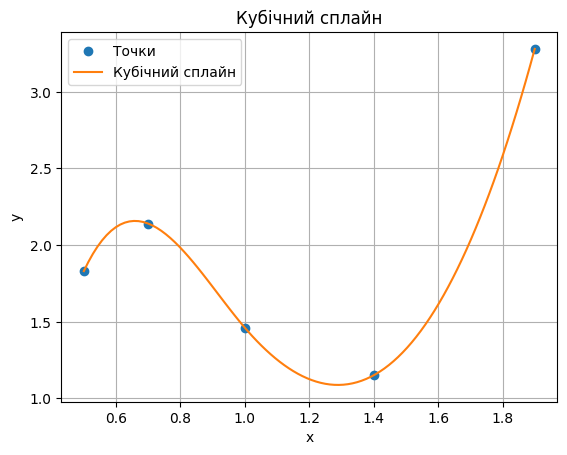

In [12]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()